In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage import exposure

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, transform

from imea import measure_2d, tools

In [25]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage import io, morphology, draw


In [33]:
# better plots in matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['image.cmap'] = 'gray'

# show all columns in pandas
pd.set_option('display.max_columns', None)

In [ ]:
#Utilisation du seuillage automatique pour ensuite pouvoir binairiser l'image 

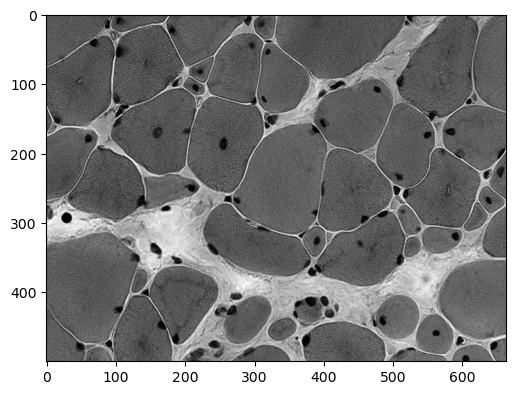

In [71]:
im = io.imread("sample_img/sample_he.jpg")
# convert the image to grayscale
im_G=rgb2gray(im)
plt.figure(figsize=(7.5, 4.5))
plt.imshow(im_G, cmap='gray')

(0.0, 1.0)

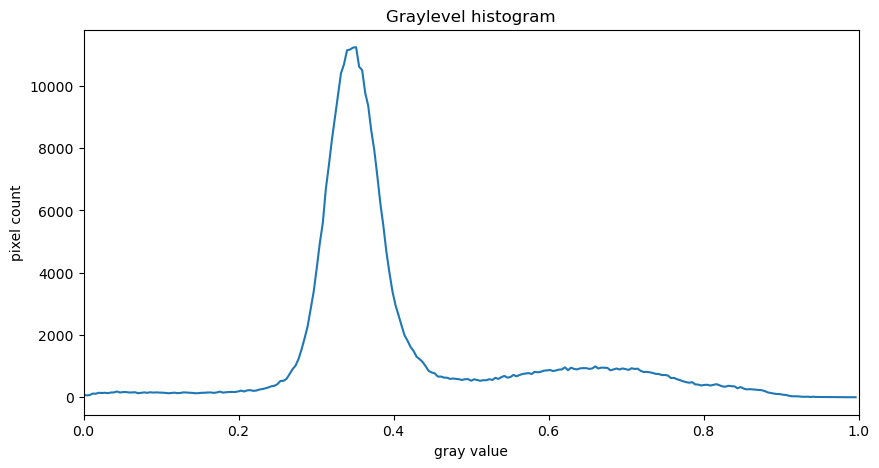

In [50]:
# blur the image to denoise
blurred_image = skimage.filters.gaussian(im_G, sigma=1.0)
# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

In [6]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

Found automatic threshold t = 0.5099190285755957.


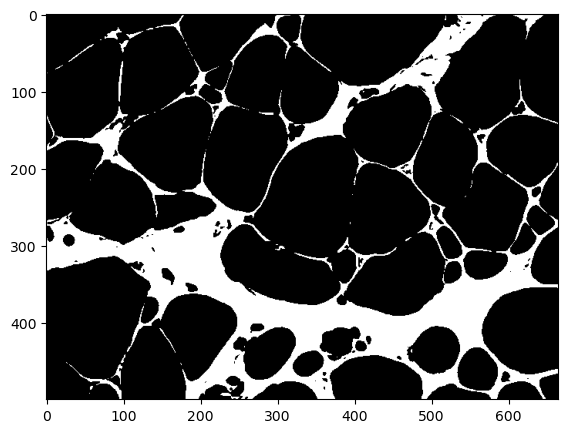

In [82]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask)
binary_mask = ~binary_mask


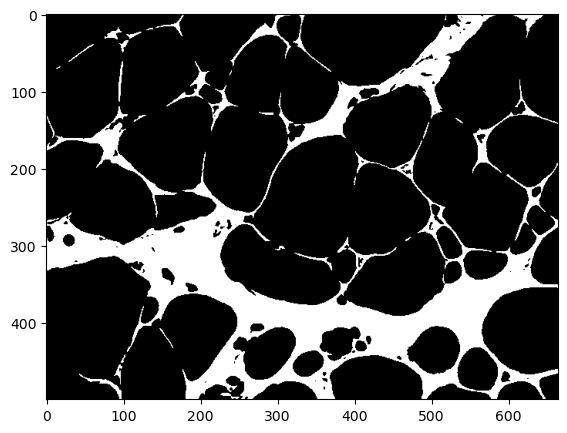

In [80]:
small_obj_bye=skimage.morphology.diameter_opening(binary_mask, diameter_threshold=6, connectivity=1, parent=None, tree_traverser=None)
fig, ax = plt.subplots()
plt.imshow(small_obj_bye)

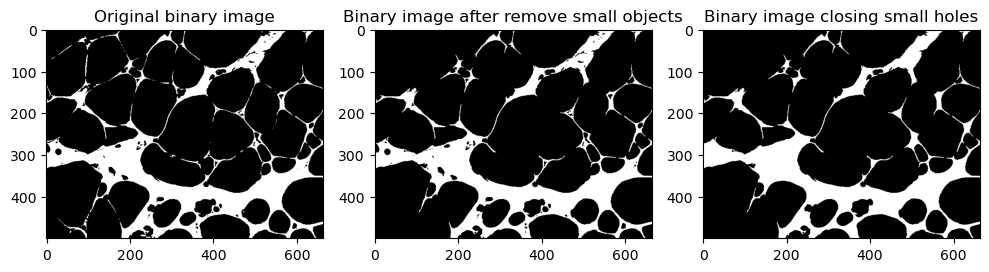

In [61]:
 min_size = 300 # you may adjust here depending on the actual image
bw_smallobjects_removed = morphology.remove_small_objects(binary_mask, min_size=min_size)

area_threshold = 300 # you may adjust here depending on the actual image
bw_smallholes_filled = morphology.remove_small_holes(bw_smallobjects_removed, area_threshold=area_threshold)

bw = bw_smallholes_filled
# plot result
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(binary_mask)
axarr[0].set_title("Original binary image")
axarr[1].imshow(bw_smallobjects_removed)
axarr[1].set_title("Binary image after remove small objects")
axarr[2].imshow(bw_smallholes_filled)
axarr[2].set_title("Binary image closing small holes")
plt.tight_layout()
plt.show()


In [15]:
#Calcul de microm/pixel de notre image à partir de la barre de calibration d'une autre image '5.jpg'
# info de l'image -> 1300x1030 pixel, barre de calibration: 50um pour 154 pixel, donc 0.32um/1 pixel
# la j'ai converti par rapport à la taille de l'image que je traite ici. Taille= 550x664
a=50/154
b=1300*1030
c=550*664
spatial_resolution_xy=(c*a)/b
print("Spatial resolution is: {:0.4f} um/Pixel".format(spatial_resolution_xy))

Spatial resolution is: 0.0886 um/Pixel


In [18]:
#Extraction des mesures avec imea 
import imea
df = imea.shape_measurements_2d(binary_mask, spatial_resolution_xy)

/Users/afaf/opt/anaconda3/envs/stage-afaf/lib/python3.9/site-packages/imea/measure_2d/macro.py:280: UserWarning: `perimeter` is zero.
  warnings.warn("`perimeter` is zero.")
/Users/afaf/opt/anaconda3/envs/stage-afaf/lib/python3.9/site-packages/imea/measure_2d/micro.py:40: UserWarning: `bw` contains <= 1 true pixel: Fractal dimension is zero.
  warnings.warn(
/Users/afaf/opt/anaconda3/envs/stage-afaf/lib/python3.9/site-packages/imea/measure_2d/micro.py:107: UserWarning: `contour` represents only a point: Fractal dimension is zero.
  warnings.warn(
/Users/afaf/opt/anaconda3/envs/stage-afaf/lib/python3.9/site-packages/imea/measure_2d/micro.py:276: UserWarning: Slope is zero slope --> fractal dimension will be set to zero.
  warnings.warn(
/Users/afaf/opt/anaconda3/envs/stage-afaf/lib/python3.9/site-packages/imea/measure_2d/micro.py:48: UserWarning: `bw` contains only a point: Fractal dimension is zero.
  warnings.warn(


In [19]:
df

,perimeter,convex_perimeter,area_projection,area_filled,area_convex,major_axis_length,minor_axis_length,diameter_max_inclosing_circle,diameter_min_enclosing_circle,diameter_circumscribing_circle,...,maxchords_median,maxchords_mean,maxchords_mode,maxchords_std,allchords_max,allchords_min,allchords_median,allchords_mean,allchords_mode,allchords_std
0,9.289623,10.346497,1.231115,1.231115,5.018558,3.144688,2.146951,0.560053,3.819251,29.561880,...,1.416836,1.487677,1.416836,3.295451,2.125253,0.088552,0.265657,0.328849,0.177104,3.380440
1,0.000000,0.000000,0.007841,0.007841,0.007841,0.000000,0.000000,0.177104,0.000018,51.183186,...,0.088552,0.088552,0.088552,0.000000,0.088552,0.088552,0.088552,0.088552,0.088552,0.000000
2,43.512321,31.045784,7.794447,7.794447,50.663909,10.208167,6.068598,1.134022,11.673730,52.985037,...,2.922223,2.957644,3.099328,8.737276,4.958925,0.088552,0.265657,0.472484,0.177104,5.740719
3,691.758736,178.147225,438.080883,551.633593,1836.070713,59.307951,41.872654,6.178382,64.010384,71.690427,...,16.692094,19.627601,10.803371,74.573638,33.472741,0.088552,0.885522,1.869603,0.088552,28.994750
4,11.106787,10.639933,2.815097,2.815097,5.441999,2.836835,2.346770,1.032687,3.951569,110.889346,...,2.258082,2.204950,1.416836,6.139218,3.453537,0.088552,0.531313,0.697070,0.088552,6.702569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5.509118,5.695662,0.744942,0.744942,1.709446,2.048247,0.944473,0.560053,2.215594,83.663857,...,0.929798,1.044916,0.708418,3.994997,1.859597,0.088552,0.177104,0.315759,0.088552,3.092161
79,0.000000,0.000000,0.007841,0.007841,0.007841,0.000000,0.000000,0.177104,0.000018,84.960126,...,0.088552,0.088552,0.088552,0.000000,0.088552,0.088552,0.088552,0.088552,0.088552,0.000000
80,1.084113,1.084113,0.117622,0.117622,0.125464,0.513354,0.286689,0.354209,0.442779,86.457181,...,0.354209,0.389630,0.354209,0.860233,0.531313,0.088552,0.265657,0.265657,0.265657,1.302678
81,0.000000,0.000000,0.007841,0.007841,0.007841,0.000000,0.000000,0.177104,0.000018,87.698003,...,0.088552,0.088552,0.088552,0.000000,0.088552,0.088552,0.088552,0.088552,0.088552,0.000000
